# Population, Agricultural Production, and the Green Revolution

In [16]:
# Install required packages
!pip install wbdata
!pip install matplotlib
!pip install pandas
!pip install plotly
!pip install eep153_tools
!pip install python_gnupg
!pip install -U gspread_pandas
!pip install wbdata plotly

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import wbdata
import plotly
import warnings

# Set Plotly as the default backend for Pandas plotting
pd.options.plotting.backend = "plotly"

# Suppress warnings about cache not found from wbdata
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

In [60]:
wbdata.get_indicators(topic=1)

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO        Agricultural machinery, tractors
AG.CON.FERT.PT.ZS     Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS        Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.HA        Arable land (hectares)
AG.LND.ARBL.HA.PC     Arable land (hectares per person)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.CREL.HA        Land under cereal production (hectares)
AG.LND.CROP.ZS        Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)

## Agricultural Analysis

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

In [70]:
# Define countries in the Maritime Southeast Asia region (using ISO-3166 country codes)
countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS']  # Brunei, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste
countries

['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS']

In [80]:
variable_labels = {"AG.PRD.CREL.MT":"Cereal Production (MT)",
                   "AG.PRD.CROP.XD":"Crop Production Index",
                  "AG.PRD.FOOD.XD":"Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'
                  # "EA.PRD.AGRI.KD":"Agricultural Value Added per Worker"
                  }

variable_labels

{'AG.PRD.CREL.MT': 'Cereal Production (MT)',
 'AG.PRD.CROP.XD': 'Crop Production Index',
 'AG.PRD.FOOD.XD': 'Food Production Index',
 'SP.RUR.TOTL': 'Total Rural Population'}

In [85]:
MSEA_ag = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country':'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])
MSEA_ag.head(10)

,Country,Cereal Production (MT),Crop Production Index,Food Production Index,Total Rural Population
Date,,,,,
1961-01-01,Indonesia,14367100.0,16.93,20.36,77335078.0
1961-01-01,Timor-Leste,34257.0,40.17,62.53,426607.0
1961-01-01,Malaysia,1097075.0,17.21,18.63,5940367.0
1961-01-01,Philippines,5176370.0,26.42,22.34,19995036.0
1961-01-01,Papua New Guinea,1850.0,27.63,29.80,1963791.0
1961-01-01,Brunei Darussalam,4908.0,72.24,10.92,50673.0
1962-01-01,Papua New Guinea,1891.0,28.88,30.93,2002896.0
1962-01-01,Philippines,5239880.0,28.08,23.83,20563931.0
1962-01-01,Indonesia,16246900.0,18.31,22.14,79315315.0


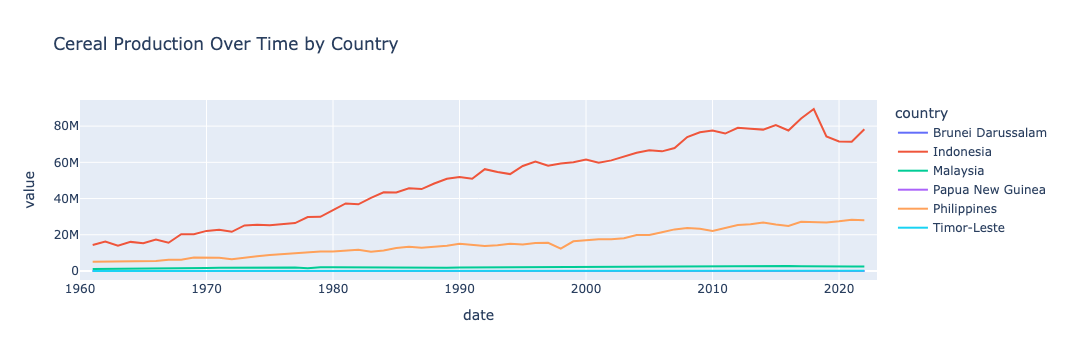

In [54]:
vars = {"AG.PRD.CREL.MT":"Cereal production"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
cereals = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
cereals.plot(title="Cereal Production Over Time by Country")

In [93]:
total_cereal_production = cereals.sum(axis=1)  
total_cereal_df = total_cereal_production.reset_index()
total_cereal_df.columns = ['Year', 'Total Cereal Production (MT)']  
total_cereal_df.head(10)

,Year,Total Cereal Production (MT)
0,1960-01-01,0.00
1,1961-01-01,164.58
2,1962-01-01,172.75
3,1963-01-01,173.69
4,1964-01-01,178.31
5,1965-01-01,181.63
6,1966-01-01,186.26
7,1967-01-01,193.39
8,1968-01-01,196.83
9,1969-01-01,208.32


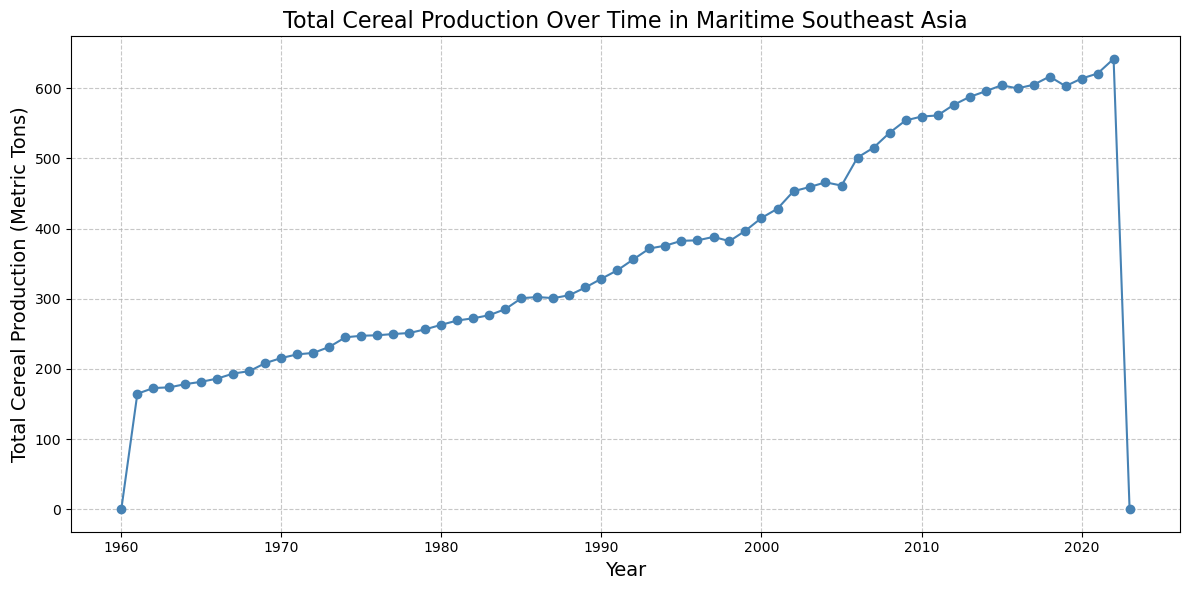

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(total_cereal_df['Year'], total_cereal_df['Total Cereal Production (MT)'], marker='o', color='steelblue')
plt.title('Total Cereal Production Over Time in Maritime Southeast Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cereal Production (Metric Tons)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

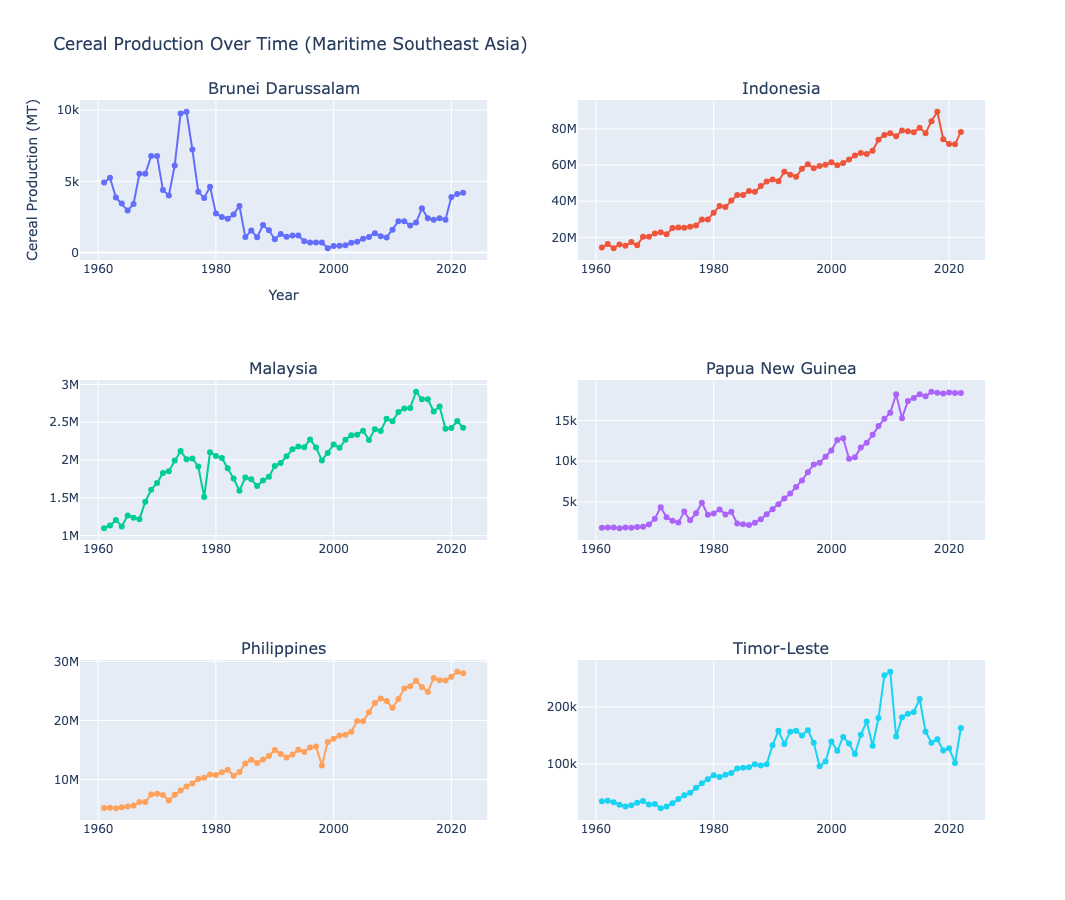

In [26]:
import wbdata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS'] 

variable_labels = {"AG.PRD.CREL.MT": "Cereal Production (MT)",
                   "AG.PRD.CROP.XD": "Crop Production Index",
                   "AG.PRD.FOOD.XD": "Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'}

MSEA_ag = wbdata.get_dataframe(variable_labels, country=countries, parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country': 'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])

def overlay_cereal_production(country_name, df, fig, row, col):
    df = df.reset_index()
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_df = df[df['Country'] == country_name]
    
    # Add the cereal production plot for the country
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Cereal Production (MT)'],
                             mode='lines+markers', name=country_name,
                             line=dict(dash='solid')),
                  row=row, col=col)
    
    fig.update_layout(title=f"Cereal Production Over Time ({country_name})",
                      xaxis_title="Year", yaxis_title="Cereal Production (MT)")

fig = make_subplots(rows=3, cols=2, subplot_titles=["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", 
                                                    "Philippines", "Timor-Leste"])

overlay_cereal_production("Brunei Darussalam", MSEA_ag, fig, 1, 1)
overlay_cereal_production("Indonesia", MSEA_ag, fig, 1, 2)
overlay_cereal_production("Malaysia", MSEA_ag, fig, 2, 1)
overlay_cereal_production("Papua New Guinea", MSEA_ag, fig, 2, 2)
overlay_cereal_production("Philippines", MSEA_ag, fig, 3, 1)
overlay_cereal_production("Timor-Leste", MSEA_ag, fig, 3, 2)

fig.update_layout(title_text="Cereal Production Over Time (Maritime Southeast Asia)",
                  height=900, width=1000, showlegend=False)

fig.show()

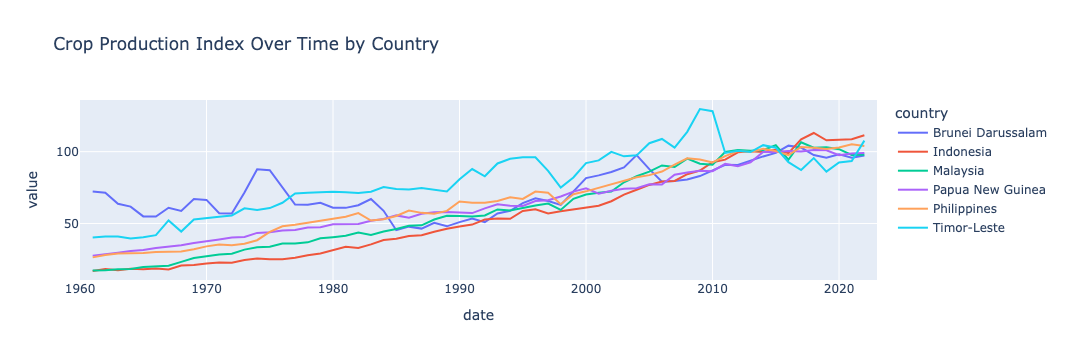

In [97]:
vars = {"AG.PRD.CROP.XD": "Crop Production Index"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
crops = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
crops.plot(title="Crop Production Index Over Time by Country")

In [100]:
total_crop_index = crops.sum(axis=1)
total_crop_df = total_crop_index.reset_index()
total_crop_df.columns = ['Year', 'Total Crop Production Index']
total_crop_df.head(10)

,Year,Total Crop Production Index
0,1960-01-01,0.00
1,1961-01-01,200.60
2,1962-01-01,204.88
3,1963-01-01,199.19
4,1964-01-01,198.19
5,1965-01-01,194.37
6,1966-01-01,198.80
7,1967-01-01,216.04
8,1968-01-01,212.46
9,1969-01-01,235.37


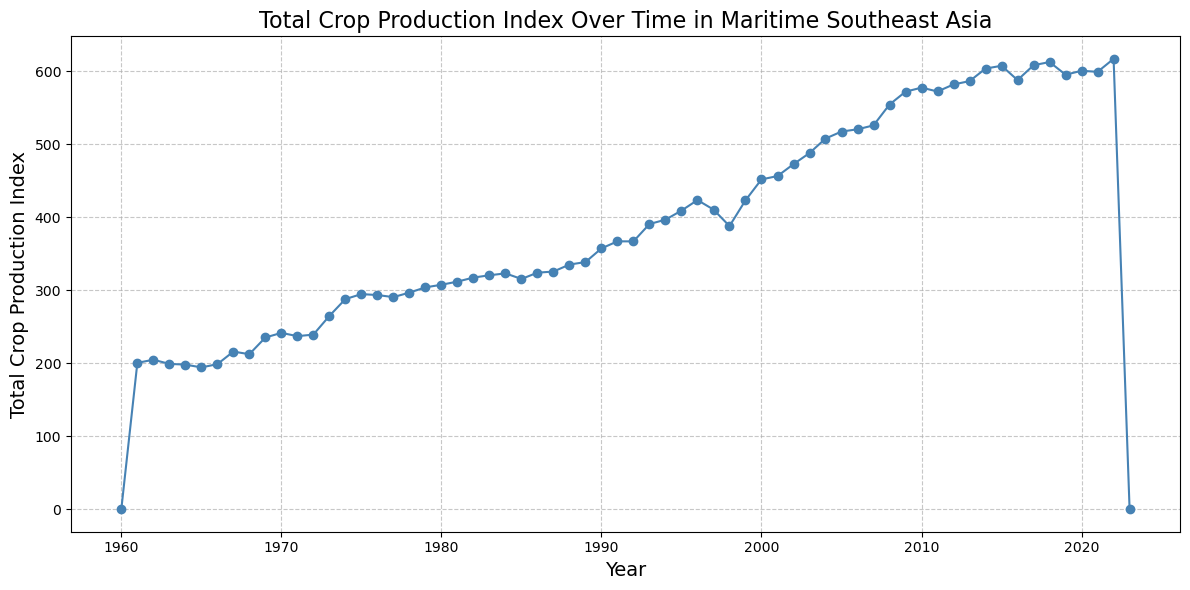

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(total_crop_df['Year'], total_crop_df['Total Crop Production Index'], marker='o', color='steelblue')
plt.title('Total Crop Production Index Over Time in Maritime Southeast Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Crop Production Index', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

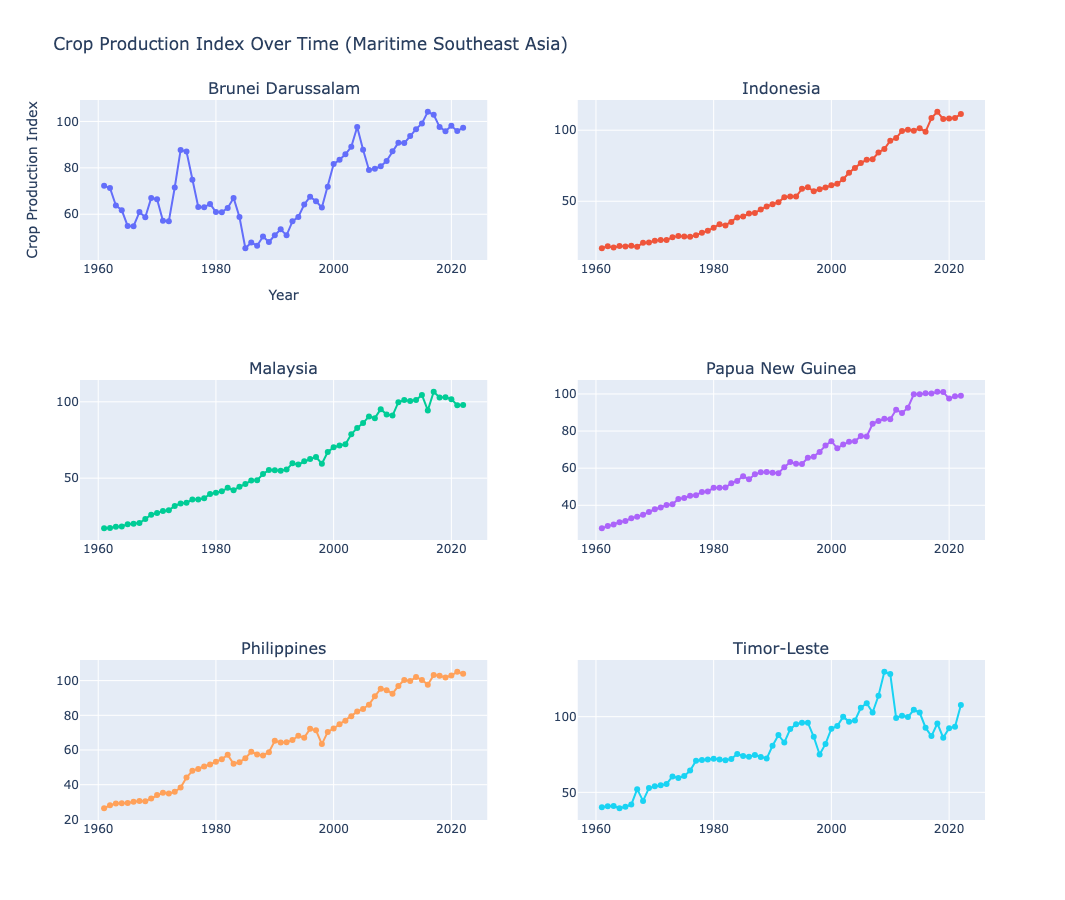

In [24]:
import wbdata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS'] 

variable_labels = {"AG.PRD.CREL.MT": "Cereal Production (MT)",
                   "AG.PRD.CROP.XD": "Crop Production Index",
                   "AG.PRD.FOOD.XD": "Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'}

MSEA_ag = wbdata.get_dataframe(variable_labels, country=countries, parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country': 'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])

def overlay_crop_production(country_name, df, fig, row, col):
    df = df.reset_index()
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_df = df[df['Country'] == country_name]
    
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Crop Production Index'],
                             mode='lines+markers', name=country_name,
                             line=dict(dash='solid')),
                  row=row, col=col)
    
    fig.update_layout(title=f"Crop Production Index Over Time ({country_name})",
                      xaxis_title="Year", yaxis_title="Crop Production Index")

fig = make_subplots(rows=3, cols=2, subplot_titles=["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", 
                                                    "Philippines", "Timor-Leste"])

overlay_crop_production("Brunei Darussalam", MSEA_ag, fig, 1, 1)
overlay_crop_production("Indonesia", MSEA_ag, fig, 1, 2)
overlay_crop_production("Malaysia", MSEA_ag, fig, 2, 1)
overlay_crop_production("Papua New Guinea", MSEA_ag, fig, 2, 2)
overlay_crop_production("Philippines", MSEA_ag, fig, 3, 1)
overlay_crop_production("Timor-Leste", MSEA_ag, fig, 3, 2)

fig.update_layout(title_text="Crop Production Index Over Time (Maritime Southeast Asia)",
                  height=900, width=1000, showlegend=False)

fig.show()

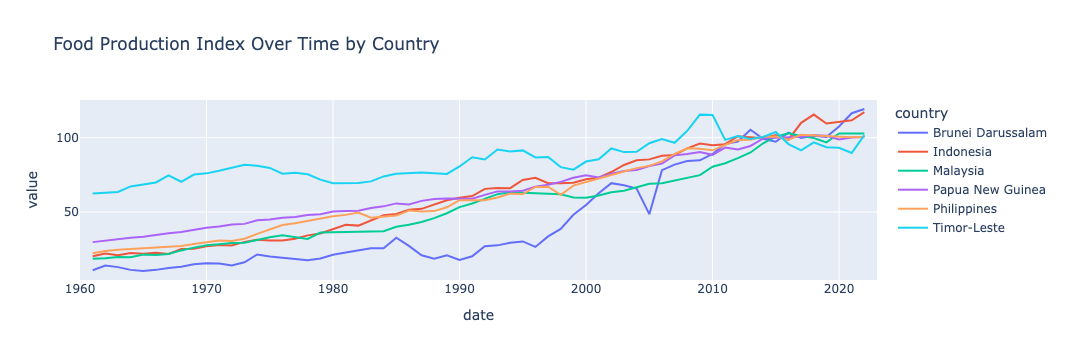

In [101]:
vars = {"AG.PRD.FOOD.XD": "Food Production Index"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
food = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
food.plot(title="Food Production Index Over Time by Country")

In [102]:
total_food_index = food.sum(axis=1)
total_food_df = total_food_index.reset_index()
total_food_df.columns = ['Year', 'Total Food Production Index']
total_food_df.head(10)

,Year,Total Food Production Index
0,1960-01-01,0.00
1,1961-01-01,164.58
2,1962-01-01,172.75
3,1963-01-01,173.69
4,1964-01-01,178.31
5,1965-01-01,181.63
6,1966-01-01,186.26
7,1967-01-01,193.39
8,1968-01-01,196.83
9,1969-01-01,208.32


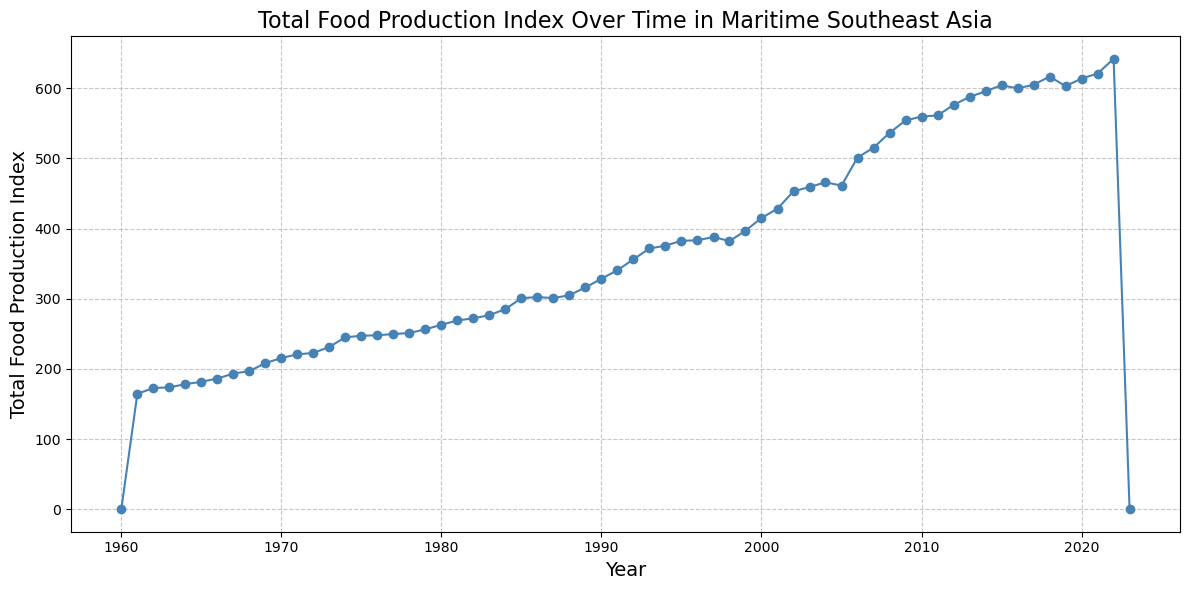

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(total_food_df['Year'], total_food_df['Total Food Production Index'], marker='o', color='steelblue')
plt.title('Total Food Production Index Over Time in Maritime Southeast Asia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Food Production Index', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

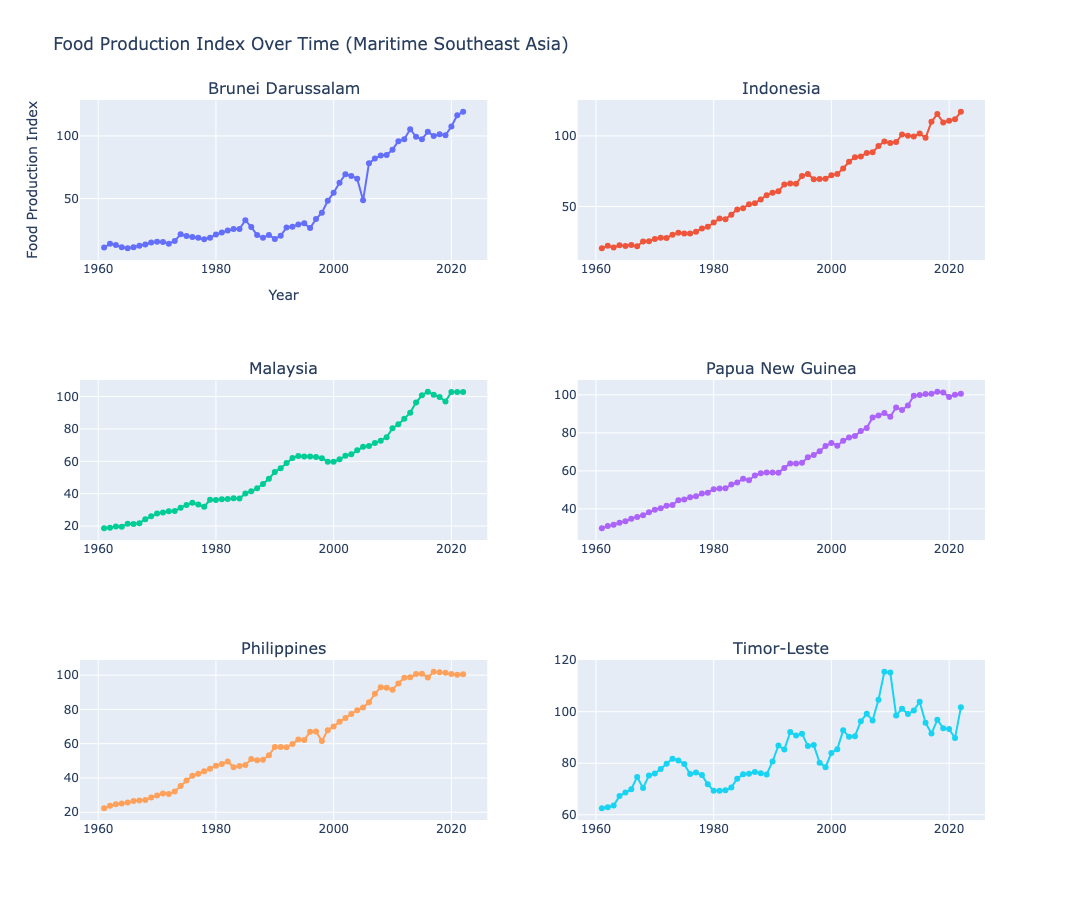

In [25]:
import wbdata
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = ['BRN', 'IDN', 'MYS', 'PNG', 'PHL', 'TLS'] 

variable_labels = {"AG.PRD.CREL.MT": "Cereal Production (MT)",
                   "AG.PRD.CROP.XD": "Crop Production Index",
                   "AG.PRD.FOOD.XD": "Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'}

MSEA_ag = wbdata.get_dataframe(variable_labels, country=countries, parse_dates=True)
MSEA_ag = MSEA_ag.reset_index()
MSEA_ag = MSEA_ag.rename(columns={'date': 'Date', 'country': 'Country'})
MSEA_ag = MSEA_ag.set_index(['Date']).sort_index()
MSEA_ag = MSEA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])

def overlay_food_production(country_name, df, fig, row, col):
    df = df.reset_index()
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    country_df = df[df['Country'] == country_name]
    
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Food Production Index'],
                             mode='lines+markers', name=country_name,
                             line=dict(dash='solid')),
                  row=row, col=col)
    
    fig.update_layout(title=f"Food Production Index Over Time ({country_name})",
                      xaxis_title="Year", yaxis_title="Food Production Index")

fig = make_subplots(rows=3, cols=2, subplot_titles=["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", 
                                                    "Philippines", "Timor-Leste"])

overlay_food_production("Brunei Darussalam", MSEA_ag, fig, 1, 1)
overlay_food_production("Indonesia", MSEA_ag, fig, 1, 2)
overlay_food_production("Malaysia", MSEA_ag, fig, 2, 1)
overlay_food_production("Papua New Guinea", MSEA_ag, fig, 2, 2)
overlay_food_production("Philippines", MSEA_ag, fig, 3, 1)
overlay_food_production("Timor-Leste", MSEA_ag, fig, 3, 2)

fig.update_layout(title_text="Food Production Index Over Time (Maritime Southeast Asia)",
                  height=900, width=1000, showlegend=False)

fig.show()

vars = {"EA.PRD.AGRI.KD": "Agricultural Value Added per Worker"}
use=["BRN", "IDN", "MYS", "PNG", "PHL", "TLS"]
cereals = wbdata.get_dataframe(vars,country=use,parse_dates=True).squeeze().unstack('country')
cereals.plot(title="Agricultural Value Added per Worker")

In [ ]:
# Load in agricultural data and specify Maritime Southeast Asia data set with attributes of interest

# Attributes of interest: Cereal Production, Crop Production Index, Food Production Index
# and Agricultural Value Added per Worker

In [ ]:
# Produce total cereal production over time plot for each country, specifying each type of cereal
# Produce same plot for the whole region

In [ ]:
# Produce Crop Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

In [ ]:
# Produce Food Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

In [ ]:
# Produce plot of Agricultural Value Added per Worker for each country

## Combined Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [ ]:
# Overlay total population growth for each country over time with crop production index over time

In [ ]:
# Overlay total crop production index over time with agriculutral value of worker added

In [ ]:
# Add asymptotes for major technological advancements in the timeline (i.e. new fertiliser, etc.)

### Mainland Southeast Asia (Cambodia, Lao People’s Democratic Republic, Myanmar, Thailand, Viet Nam)

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)